In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import random

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

not here


In [280]:
p0 = [0.86, 0.25] # high
p1 = [0.74, 0.37] # low

In [328]:
aln = ALNModel()

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

#aln.params.IA_init = np.zeros((1))

N = aln.params.N

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [421]:
dur = 500.
t_pen = 0.6

In [422]:
file_ = '1_E.pickle'
folder = str(os.getcwd().split('data_2')[1])
print(folder)
case = '1'

/adaptation_excursion


In [423]:
dur_pre = 10
dur_post = 100

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-10
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

p_var = [0]
c_var = [0]
#wp = 1. / (dur * t_pen[1] - t_pen[0] * dur)
wp = 1. / (dur - t_pen*dur)

if case in ['1', '2']:    # low to high
    max_I = [3., -3.]
else:
    max_I = [-3., 3.]
    
if case in ['1', '3']:    # sparsity
    factor_ws = 1.
    factor_we = 0.
else:
    factor_ws = 0.
    factor_we = 1.
    
maxC = [5., -5., 0.18, 0.]
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

In [424]:
bestControl_ = None

if os.path.isfile(file_) :
    print("file found")
    
    with open(file_,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0]

file found


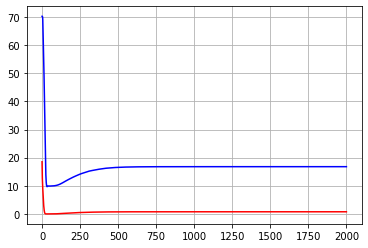

In [420]:
# get initial parameters and target states

aln.params.sigma_ou = 0.

aln.params.duration = 2000.

aln.params.mue_ext_mean = p1[0] * 5.
aln.params.mui_ext_mean = p1[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars.copy()

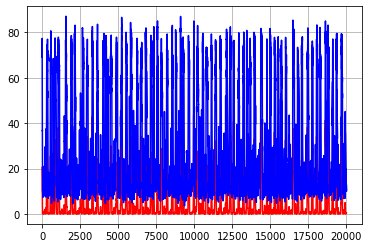

21.675775134201206
68.9723480788201


In [404]:
aln.params.sigma_ou = 0.1

aln.params.duration = 20000.

aln.params.mue_ext_mean = p1[0] * 5.
aln.params.mui_ext_mean = p1[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

e_ = []
i_ = []
t_ind = []

for t in range(len(aln.t)):
    
    if aln.rates_exc[0,t] < 10:
        continue
    if aln.rates_inh[0,t] < 50:
        continue
    
    t_ind.append(t)
    e_.append(aln.rates_exc[0,t])
    i_.append(aln.rates_inh[0,t])
    
print(np.mean(e_))
print(np.mean(i_))

target = np.zeros((2))
target[0] = np.mean(e_)
target[1] = np.mean(i_)

set cost params:  0.005 0.0 0.0
interpolate adjoint :  True True True
initial cost =  218.73170038784292
RUN  0 , total integrated cost =  218.73170038784292
Gradient descend method:  None
RUN  0 , total integrated cost =  218.73170038784292
Improved over  0  iterations in  0.0  seconds by  0.0  percent.


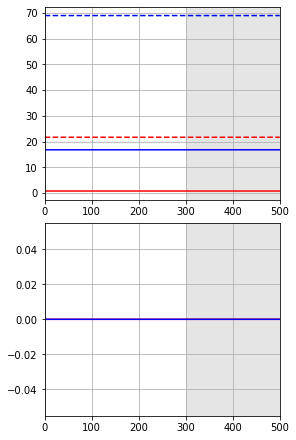

In [405]:
# get uncontrolled cost
    
aln.params.duration = dur
aln.params.sigma_ou = 0.

target_ = aln.getZeroTarget()
target_[:,0,:] = target[0]
target_[:,1,:] = target[1]

cost.setParams(wp, 0.0, 0.0)

aln.params.mue_ext_mean = p1[0] * 5.
aln.params.mui_ext_mean = p1[1] * 5.

setinit(initVars, aln)
control0 = aln.getZeroControl()

cgv = None
max_it = 0

bestControl_init_, bestState_init_, cost_init_, runtime_init_, grad_init_, phi_init_, phi1_, costnode_init_ = aln.A1(
    control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
    startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = t_pen)

if True:
    plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,6) )
    ax[1].plot(plot_time_array, bestControl_init_[0,0,n_pre-1:-n_post+1], color = 'red')
    ax[0].plot(plot_time_array, bestState_init_[0,0,n_pre-1:-n_post+1], color= 'red')
    ax[1].plot(plot_time_array, bestControl_init_[0,1,n_pre-1:-n_post+1], color = 'blue')
    ax[0].plot(plot_time_array, bestState_init_[0,1,n_pre-1:-n_post+1], color= 'blue')
    ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
    ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')

    for k in range(2):
        ax[k].set_xlim(0.,dur)
        ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

cost_uncontrolled = cost_init_[0]

set cost params:  0.005 0.0 10.0
interpolate adjoint :  True True True
initial cost =  218.73170038784292
RUN  0 , total integrated cost =  218.73170038784292
Gradient descend method:  None
RUN  1 , total integrated cost =  102.46759488139062
RUN  2 , total integrated cost =  98.70288601657005
RUN  3 , total integrated cost =  98.62807666823434
RUN  4 , total integrated cost =  98.55695681275404
RUN  5 , total integrated cost =  98.53811442847153
RUN  6 , total integrated cost =  98.5201653928207
RUN  7 , total integrated cost =  98.50815444598459


ERROR:root:Problem in initial value trasfer post


RUN  8 , total integrated cost =  98.49590836409216
RUN  9 , total integrated cost =  98.48172011087216
RUN  10 , total integrated cost =  98.46541784139797
RUN  10 , total integrated cost =  98.46541784139797
Improved over  10  iterations in  1.0017385690007359  seconds by  54.983471683891935  percent.
Problem in initial value trasfer post:  Vmean_exc -57.74817461601439 -57.765769560851645


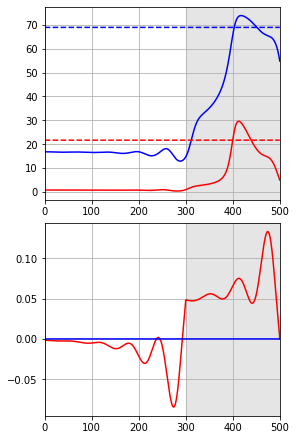

uncontrolled cost :  218.73170038784292
cost splitting :  17582.004759785414 [1.0555394 0.       ]


In [406]:
cgv = None
j = 0

aln.params.duration = dur
setinit(initVars, aln)

target_ = aln.getZeroTarget()
target_[:,0,:] = target[0]
target_[:,1,:] = target[1]

control0 = aln.getZeroControl()
cost.setParams(wp, 0., 10.)
max_it = int(10)

#control0[0,0,2400:2500] = 0.5

bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
    control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
    startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = t_pen)

if True:
    plot_time_array = np.arange(0.,round(dur+aln.params.dt,1),aln.params.dt)
    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,6) )
    ax[1].plot(plot_time_array, bestControl_[0,0,n_pre-1:-n_post+1], color = 'red')
    ax[0].plot(plot_time_array, bestState_[0,0,n_pre-1:-n_post+1], color= 'red')
    ax[1].plot(plot_time_array, bestControl_[0,1,n_pre-1:-n_post+1], color = 'blue')
    ax[0].plot(plot_time_array, bestState_[0,1,n_pre-1:-n_post+1], color= 'blue')
    ax[0].plot(plot_time_array, target_[0,0,n_pre-1:-n_post+1], linestyle = '--', color='red')
    ax[0].plot(plot_time_array, target_[0,1,n_pre-1:-n_post+1], linestyle = '--', color='blue')

    for k in range(2):
        ax[k].set_xlim(0.,dur)
        ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
    plt.show()

print('uncontrolled cost : ', cost_uncontrolled)
print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])    

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  88.96556320317417
RUN  0 , total integrated cost =  88.96556320317417
Gradient descend method:  None
RUN  1 , total integrated cost =  88.95349528396578
RUN  2 , total integrated cost =  88.9414857358138
RUN  3 , total integrated cost =  88.92934460255775
RUN  4 , total integrated cost =  88.91739395920192
RUN  5 , total integrated cost =  88.90624232633859
RUN  6 , total integrated cost =  88.8948981369062
RUN  7 , total integrated cost =  88.88292537598687
RUN  8 , total integrated cost =  88.87088016162231
RUN  9 , total integrated cost =  88.85947753426764
RUN  10 , total integrated cost =  88.8483665501383
RUN  11 , total integrated cost =  88.8356336264562
RUN  12 , total integrated cost =  88.82269147900092
RUN  13 , total integrated cost =  88.8112693804626
RUN  14 , total integrated cost =  88.80005554627121
RUN  15 , total integrated cost =  88.78782261539621
RUN  16 , total integrated cost 

ERROR:root:Problem in initial value trasfer post


RUN  1000 , total integrated cost =  3.882777029796761
RUN  1000 , total integrated cost =  3.882777029796761
Improved over  1000  iterations in  164.74689888901776  seconds by  95.63564047705795  percent.
Problem in initial value trasfer post:  Vmean_exc -56.643298222903255 -56.64762676368117
cost splitting :  16.30117252450276 [3.80126493e+00 6.23621103e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.882777029796761
RUN  0 , total integrated cost =  3.882777029796761
Gradient descend method:  None
RUN  1 , total integrated cost =  3.8825360039425325
RUN  2 , total integrated cost =  3.88230538278451
RUN  3 , total integrated cost =  3.8820743327968623
RUN  4 , total integrated cost =  3.8818541611927557
RUN  5 , total integrated cost =  3.8816416235979325
RUN  6 , total integrated cost =  3.8814314882898193
RUN  7 , total integrated cost =  3.8812253149202633
RUN  8 , total integrated cost =  3.8810251887256877
RUN  9 , total integrated co

ERROR:root:Problem in initial value trasfer post


RUN  1000 , total integrated cost =  3.8584136175959283
RUN  1000 , total integrated cost =  3.8584136175959283
Improved over  1000  iterations in  162.9473458880093  seconds by  0.6274738933981041  percent.
Problem in initial value trasfer post:  Vmean_exc -56.63772831075401 -56.6411771319168
cost splitting :  13.46186233473418 [3.79109807e+00 6.23621103e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.8584136175959283
RUN  0 , total integrated cost =  3.8584136175959283
Gradient descend method:  None
RUN  1 , total integrated cost =  3.858413101891926
RUN  2 , total integrated cost =  3.8584125806529035
RUN  3 , total integrated cost =  3.85841202999728
RUN  4 , total integrated cost =  3.858411488774641
RUN  5 , total integrated cost =  3.858410972561377
RUN  6 , total integrated cost =  3.8584104742111194
RUN  7 , total integrated cost =  3.8584099219608485
RUN  8 , total integrated cost =  3.8584093430753903
RUN  9 , total integrated cos

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer post


Control only changes marginally.
RUN  188 , total integrated cost =  3.8582564298394106
Improved over  188  iterations in  28.099888555007055  seconds by  0.0040738959607864444  percent.
Problem in initial value trasfer post:  Vmean_exc -56.637739858319534 -56.64119143323854
cost splitting :  13.467318391965081 [3.79091360e+00 6.23621103e-06]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.8582564298394106
RUN  0 , total integrated cost =  3.8582564298394106
Gradient descend method:  None
RUN  1 , total integrated cost =  3.8582564298394106
Control only changes marginally.
RUN  1 , total integrated cost =  3.8582564298394106
Improved over  1  iterations in  0.16072744099074043  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -56.637739858319534 -56.64119143323854
cost splitting :  13.467318391965081 [3.79091360e+00 6.23621103e-06]


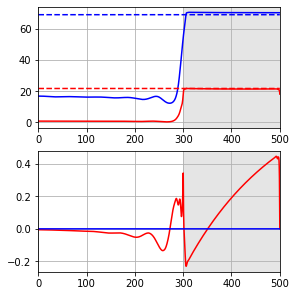

In [407]:
c_var = [0,1]
max_it = int(1000)
conv = False

tol = 1e-6
    
while not conv:

    weight_ = 1.

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[2] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        for k in range(2):
            ax[k].set_xlim(0.,dur)
            ax[k].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

ERROR:root:Problem in initial value trasfer post


set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.8582490059849817
RUN  0 , total integrated cost =  3.8582490059849817
Gradient descend method:  None
RUN  1 , total integrated cost =  3.8582490059849817
Control only changes marginally.
RUN  1 , total integrated cost =  3.8582490059849817
Improved over  1  iterations in  0.11791780500789173  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -56.63774206782227 -56.641194002926284
cost splitting :  13.468146309309438 [3.79090822e+00 4.98673921e-08]


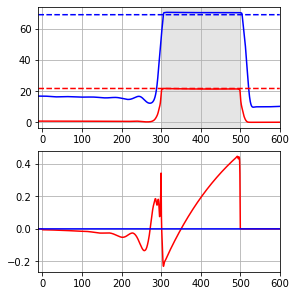

In [409]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-8
    
while not conv:

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[3] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        ax[0].set_xlim(-dur_pre,dur+dur_post)
        ax[1].set_xlim(-dur_pre,dur+dur_post)
        ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)

set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.8582490059849817
RUN  0 , total integrated cost =  3.8582490059849817
Gradient descend method:  None
RUN  1 , total integrated cost =  3.858248974011576
RUN  2 , total integrated cost =  3.8582489718478747
RUN  3 , total integrated cost =  3.858248971847732
RUN  4 , total integrated cost =  3.85824897184761
RUN  5 , total integrated cost =  3.858248971847378
RUN  6 , total integrated cost =  3.858248971846483
RUN  7 , total integrated cost =  3.8582489718175483
RUN  8 , total integrated cost =  3.8582489716919324
RUN  9 , total integrated cost =  3.8582489716845587
RUN  10 , total integrated cost =  3.8582489716841244
RUN  11 , total integrated cost =  3.8582489716839334
RUN  12 , total integrated cost =  3.8582489716838646
RUN  13 , total integrated cost =  3.8582489716838064
RUN  14 , total integrated cost =  3.8582489716837025
RUN  15 , total integrated cost =  3.858248971683453
RUN  16 , total i

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer post


Control only changes marginally.
RUN  22 , total integrated cost =  3.8582489713696337
Improved over  22  iterations in  2.7015044300060254  seconds by  8.971776566113476e-07  percent.
Problem in initial value trasfer post:  Vmean_exc -56.63774206134417 -56.64119399712557
cost splitting :  13.46816052935231 [3.79090817e+00 5.69883478e-10]
set cost params:  0.005 0.0 1.0
interpolate adjoint :  True True True
initial cost =  3.8582489713696337
RUN  0 , total integrated cost =  3.8582489713696337
Gradient descend method:  None
RUN  1 , total integrated cost =  3.8582489713696337
Control only changes marginally.
RUN  1 , total integrated cost =  3.8582489713696337
Improved over  1  iterations in  0.14639741901191883  seconds by  0.0  percent.
Problem in initial value trasfer post:  Vmean_exc -56.63774206134417 -56.64119399712557
cost splitting :  13.46816052935231 [3.79090817e+00 5.69883478e-10]


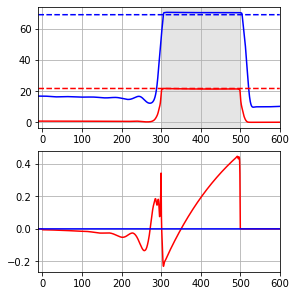

In [410]:
c_var = [0,1]
max_it = int(300)
conv = False

tol = 1e-10
    
while not conv:

    aln.params.duration = dur
    cost.setParams(wp, weight_ * factor_we, weight_ * factor_ws)
    weights_ = cost.getParams()

    setinit(initVars, aln)

    target_ = aln.getZeroTarget()
    target_[:,0,:] = target[0]
    target_[:,1,:] = target[1]

    control0 = aln.getZeroControl()
    control0 = bestControl_[:,:,n_pre-1:-n_post+1]

    bestControl_, bestState_, cost_, runtime_, grad_, phi_, phi1_, costnode_ = aln.A1(
        control0, target_, c_scheme, u_mat, u_scheme, max_iteration_ = max_it, tolerance_ = tol,
        startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
        t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = cgv, control_variables_ = c_var,
        prec_variables_ = p_var, transition_time_ = t_pen)

    if cost_[3] == 0.:
        conv = True

    #print('uncontrolled cost : ', cost_uncontrolled[i])
    print('cost splitting : ', costnode_[0][0][0], costnode_[2][0][:2])

    if conv and True:
        time_ = np.arange(-dur_pre,round(dur+dur_post+aln.params.dt,1),aln.params.dt)
        target_ = aln.getZeroTarget()
        target_[:,0,:] = target[0]
        target_[:,1,:] = target[1]

        fig, ax = plt.subplots(2,1, constrained_layout=True, figsize = (4,4) )
        ax[1].plot(time_, bestControl_[0,0,:], color = 'red')
        ax[0].plot(time_, bestState_[0,0,:], color= 'red')
        ax[1].plot(time_, bestControl_[0,1,:], color = 'blue')
        ax[0].plot(time_, bestState_[0,1,:], color= 'blue')
        ax[0].plot(time_, target_[0,0,:], linestyle = '--', color='red')
        ax[0].plot(time_, target_[0,1,:], linestyle = '--', color='blue')
        ax[0].set_xlim(-dur_pre,dur+dur_post)
        ax[1].set_xlim(-dur_pre,dur+dur_post)
        ax[0].axvspan(dur*t_pen, dur, alpha=0.2, color='gray')
        plt.show()

    with open(file_,'wb') as f:
        pickle.dump([bestControl_, bestState_, cost_, costnode_, weights_], f)